In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv("D:\\data science data sets\\nba_2013.csv")

In [3]:
a.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
a.shape

(481, 31)

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [6]:
a.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:
cont_data = a.select_dtypes(["int64","float64"])
cont_data.isnull().sum()
cont_data.shape

(481, 27)

In [8]:
for feat in cont_data.columns:
    if cont_data[feat].dtypes=="int64":
        cont_data[feat].fillna(cont_data[feat].mean(),inplace=True)
    

C:\Users\devendra\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
for feat in cont_data.columns:
    if cont_data[feat].dtypes=="float64":
        cont_data[feat].fillna(cont_data[feat].mean(),inplace=True)
    

In [10]:
cont_data.isnull().sum()

age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg.           0
x3p           0
x3pa          0
x3p.          0
x2p           0
x2pa          0
x2p.          0
efg.          0
ft            0
fta           0
ft.           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
season_end    0
dtype: int64

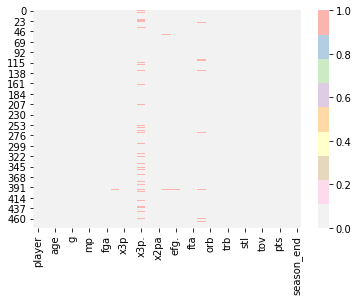

In [11]:
a.isnull().sum()
sns.heatmap(a.isnull(),cmap="Pastel1_r")

In [12]:
cat_data = a.select_dtypes("object")

In [13]:
cat_data.isnull().sum()

player          0
pos             0
bref_team_id    0
season          0
dtype: int64

In [14]:
cat_data

,player,pos,bref_team_id,season
0,Quincy Acy,SF,TOT,2013-2014
1,Steven Adams,C,OKC,2013-2014
2,Jeff Adrien,PF,TOT,2013-2014
3,Arron Afflalo,SG,ORL,2013-2014
4,Alexis Ajinca,C,NOP,2013-2014
...,...,...,...,...
476,Tony Wroten,SG,PHI,2013-2014
477,Nick Young,SG,LAL,2013-2014
478,Thaddeus Young,PF,PHI,2013-2014
479,Cody Zeller,C,CHA,2013-2014


In [15]:
for feat2 in cat_data.columns:
    if cat_data[feat2].dtypes=="object":
        print("_"*10,feat2,end="_")
        print("_"*10)
        print(cat_data[feat2].value_counts())
        

__________ player___________
Michael Beasley      1
Wesley Matthews      1
Chris Johnson        1
Kyle Korver          1
Joakim Noah          1
                    ..
Darrell Arthur       1
David West           1
Matt Barnes          1
Markieff Morris      1
Marreese Speights    1
Name: player, Length: 481, dtype: int64
__________ pos___________
SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64
__________ bref_team_id___________
TOT    63
NOP    18
OKC    17
UTA    16
LAC    16
LAL    16
DAL    15
PHO    15
ATL    15
MIA    15
NYK    15
HOU    15
DET    15
BRK    15
POR    15
BOS    14
WAS    14
CLE    14
SAS    14
MIN    14
CHA    13
MEM    13
MIL    13
ORL    13
PHI    12
GSW    12
DEN    12
IND    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64
__________ season___________
2013-2014    481
Name: season, dtype: int64


In [16]:
# we drop the Player Column.
cat_data.drop(["player"],1).head()

,pos,bref_team_id,season
0,SF,TOT,2013-2014
1,C,OKC,2013-2014
2,PF,TOT,2013-2014
3,SG,ORL,2013-2014
4,C,NOP,2013-2014


In [17]:
# we use label encoding for "pos" column
from sklearn import preprocessing

In [18]:
pp = preprocessing.LabelEncoder()

In [19]:
for feat3 in cat_data.columns:
    cat_data[feat3]=pp.fit_transform(cat_data[feat3])

C:\Users\devendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# now we club cont data and cat data
combined_data =pd.concat([cont_data,cat_data],1)

In [21]:
combined_data.info() , combined_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
age             481 non-null int64
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             481 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            481 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            481 non-null float64
efg.            481 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             481 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk             481 non-null int64
tov             481 non-null int64
pf              481 non-null int64
pts       

(None, (481, 31))

In [22]:
# Now we create x and y variable
x=combined_data.drop(["pts"],1)
y=combined_data["pts"]

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale_x=sc.fit_transform(x)
scale_x

array([[-0.83677633,  0.3852869 , -0.86310432, ...,  0.63080874,
         1.26149994,  0.        ],
       [-1.55210112,  1.09685132, -0.1880585 , ..., -1.79654328,
         0.40020616,  0.        ],
       [ 0.11699006, -0.01002666, -0.45807683, ..., -0.34013207,
         1.26149994,  0.        ],
       ...,
       [-0.35989314,  1.01778861,  1.76957436, ..., -0.34013207,
         0.6155296 ,  0.        ],
       [-1.31365952,  1.13638268, -0.76184744, ..., -1.79654328,
        -1.43004314,  0.        ],
       [-0.59833473,  0.6620064 , -0.5593337 , ..., -1.79654328,
        -1.21471969,  0.        ]])

In [24]:
scale_x.shape , y.shape

((481, 30), (481,))

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=150)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((360, 30), (121, 30), (360,), (121,))

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
Kr = KNeighborsRegressor()
Kr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [28]:
k_pred = Kr.predict(x_test)
k_pred

array([4.4200e+01, 3.6000e+00, 9.1340e+02, 1.3320e+02, 1.1600e+01,
       4.2000e+01, 8.0520e+02, 8.7700e+02, 7.7500e+02, 6.6300e+02,
       7.4600e+01, 2.6000e+00, 4.6760e+02, 1.5868e+03, 1.2360e+02,
       4.1100e+02, 1.7440e+02, 7.9180e+02, 3.4600e+02, 1.2062e+03,
       9.2960e+02, 3.4300e+02, 8.9800e+01, 7.6980e+02, 1.2940e+02,
       6.4640e+02, 6.6800e+01, 2.3700e+02, 3.3400e+01, 1.9600e+01,
       3.6840e+02, 9.5600e+02, 5.6300e+02, 1.8400e+03, 4.6320e+02,
       9.3540e+02, 2.0060e+02, 8.5040e+02, 1.8620e+02, 1.7980e+02,
       7.8420e+02, 7.6000e+00, 1.2374e+03, 8.9920e+02, 7.5400e+01,
       2.0760e+02, 6.6100e+02, 1.0146e+03, 3.3600e+01, 9.1900e+02,
       6.6480e+02, 3.7640e+02, 5.6160e+02, 1.0200e+01, 9.5800e+01,
       5.1640e+02, 5.0220e+02, 3.9400e+01, 8.1260e+02, 8.4480e+02,
       1.8760e+02, 1.4700e+02, 6.4800e+01, 4.0880e+02, 1.1350e+03,
       3.8360e+02, 1.3118e+03, 1.3326e+03, 1.5778e+03, 1.0676e+03,
       1.0380e+03, 8.6080e+02, 6.0320e+02, 3.3540e+02, 1.0660e

In [29]:
from sklearn.metrics import r2_score
k_score = r2_score(y_test,k_pred)
k_score

0.979650137651366

Text(0.5, 1.0, 'Actual Pts vs Predicted Pts')

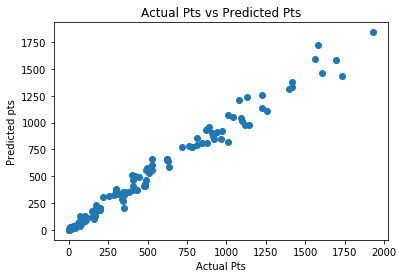

In [30]:
#Plotting the scatter plots
plt.scatter(y_test, k_pred)
plt.xlabel("Actual Pts")
plt.ylabel("Predicted pts")
plt.title("Actual Pts vs Predicted Pts")